In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
nhs_2024 = pd.read_csv("nhs_ae_2024_cleaned.csv")

# Ensure 'month' column is categorical and ordered correctly
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
nhs_2024['month'] = pd.Categorical(nhs_2024['month'], categories=months_order, ordered=True)

# Show the first few rows
print(nhs_2024.head())


              period org_code               parent_org  \
0  MSitAE-APRIL-2024      AAH  NHS ENGLAND SOUTH WEST    
1  MSitAE-APRIL-2024      RAN       NHS ENGLAND LONDON   
2  MSitAE-APRIL-2024    8J094    NHS ENGLAND MIDLANDS    
3  MSitAE-APRIL-2024    AD913       NHS ENGLAND LONDON   
4  MSitAE-APRIL-2024    AQN04  NHS ENGLAND SOUTH EAST    

                                        org_name  a&e_attendances_type_1  \
0                     TETBURY HOSPITAL TRUST LTD                       0   
1  ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST                       0   
2                                     BADGER LTD                       0   
3                           BECKENHAM BEACON UCC                       0   
4                              PHL LYMINGTON UTC                       0   

   a&e_attendances_type_2  a&e_attendances_other_a&e_department  \
0                       0                                   546   
1                       0                                   

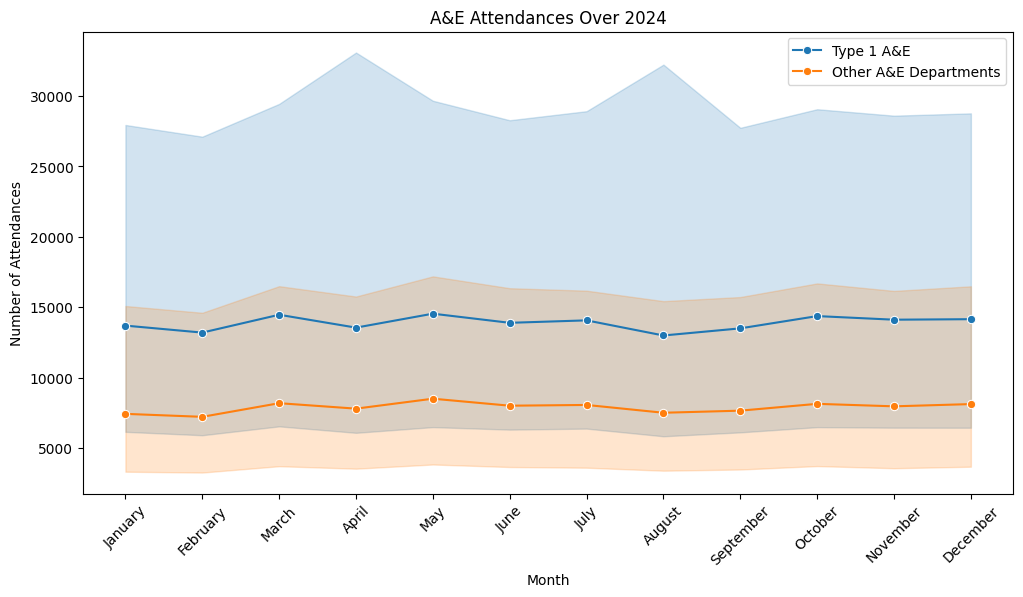

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=nhs_2024, x='month', y='a&e_attendances_type_1', marker='o', label="Type 1 A&E")
sns.lineplot(data=nhs_2024, x='month', y='a&e_attendances_other_a&e_department', marker='o', label="Other A&E Departments")

plt.xticks(rotation=45)
plt.ylabel("Number of Attendances")
plt.xlabel("Month")
plt.title("A&E Attendances Over 2024")
plt.legend()
plt.show()


/var/folders/12/9jvww_b906s7rr1mrprk45v80000gn/T/ipykernel_53245/754283967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=nhs_2024, x='month', y='percentage_seen_within_4_hours', palette="coolwarm")


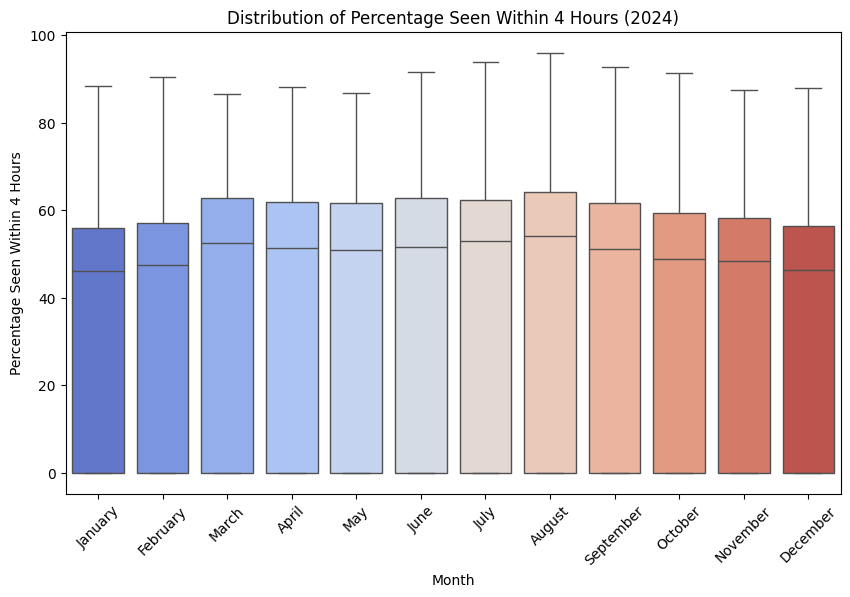

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=nhs_2024, x='month', y='percentage_seen_within_4_hours', palette="coolwarm")

plt.xticks(rotation=45)
plt.ylabel("Percentage Seen Within 4 Hours")
plt.xlabel("Month")
plt.title("Distribution of Percentage Seen Within 4 Hours (2024)")
plt.show()


/var/folders/12/9jvww_b906s7rr1mrprk45v80000gn/T/ipykernel_53245/3493285771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hospitals.values, y=top_hospitals.index, palette="viridis")


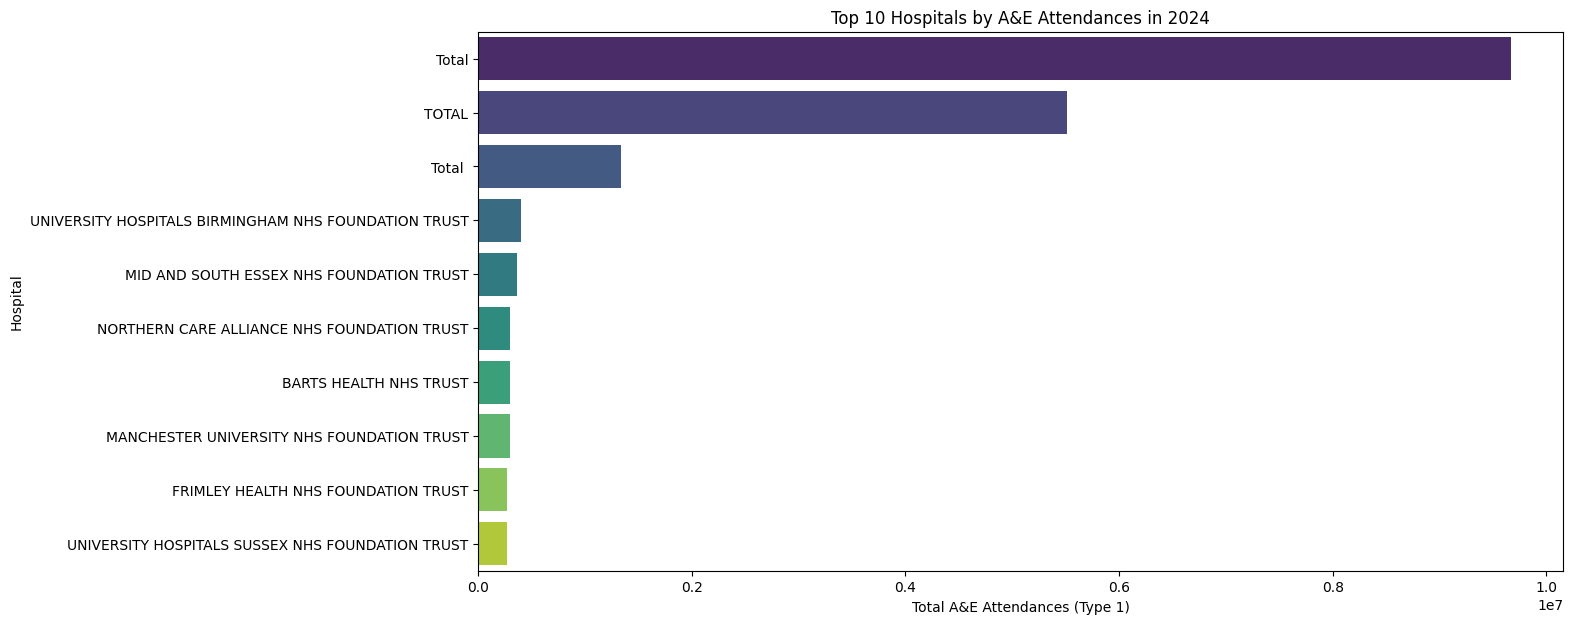

In [7]:
plt.figure(figsize=(14, 7))
top_hospitals = nhs_2024.groupby("org_name")["a&e_attendances_type_1"].sum().nlargest(10)
sns.barplot(x=top_hospitals.values, y=top_hospitals.index, palette="viridis")

plt.xlabel("Total A&E Attendances (Type 1)")
plt.ylabel("Hospital")
plt.title("Top 10 Hospitals by A&E Attendances in 2024")
plt.show()


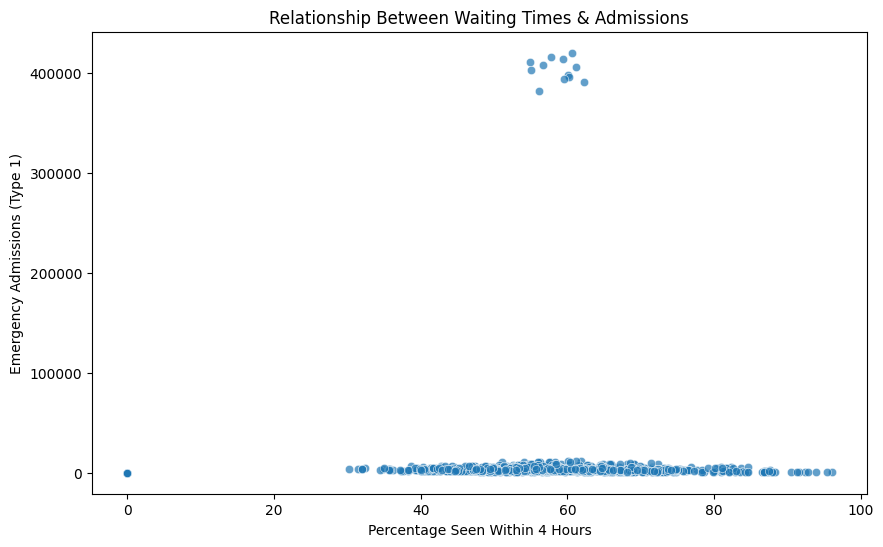

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nhs_2024, x='percentage_seen_within_4_hours', y='emergency_admissions_via_a&e_-_type_1', alpha=0.7)

plt.xlabel("Percentage Seen Within 4 Hours")
plt.ylabel("Emergency Admissions (Type 1)")
plt.title("Relationship Between Waiting Times & Admissions")
plt.show()


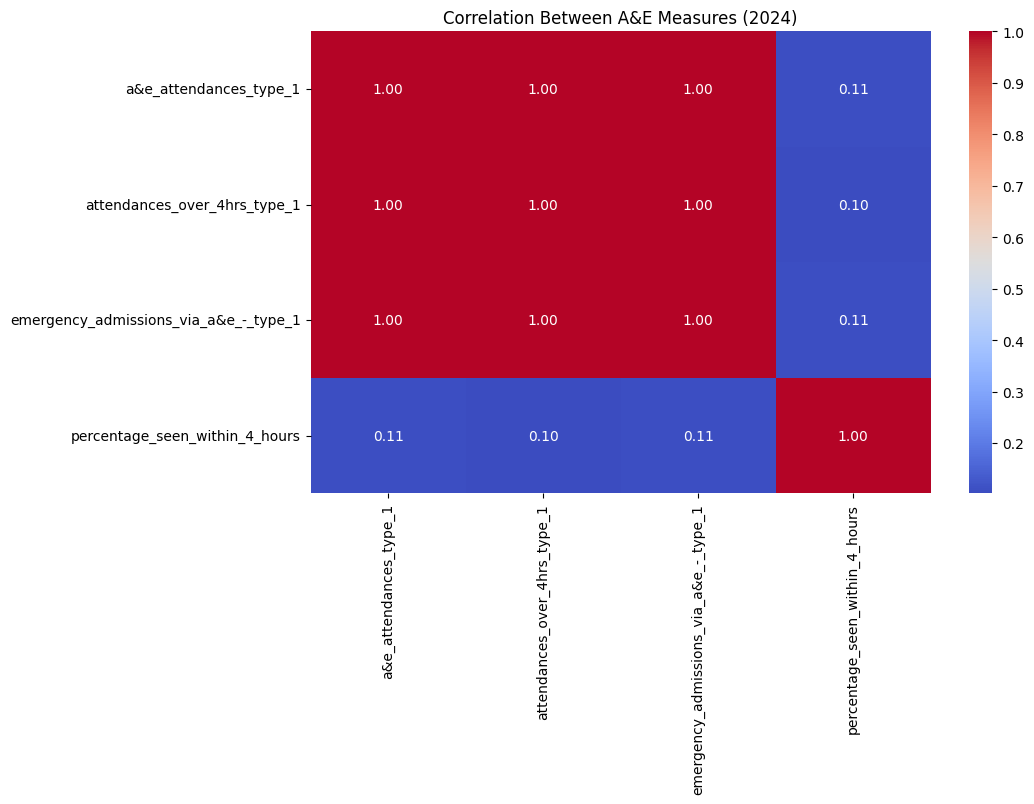

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(nhs_2024[['a&e_attendances_type_1', 'attendances_over_4hrs_type_1',
                      'emergency_admissions_via_a&e_-_type_1', 'percentage_seen_within_4_hours']].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Between A&E Measures (2024)")
plt.show()
